## Iterative Process

Iteration  1 Error:  0.11103162518211473
Iteration  2 Error:  0.02143281764235455


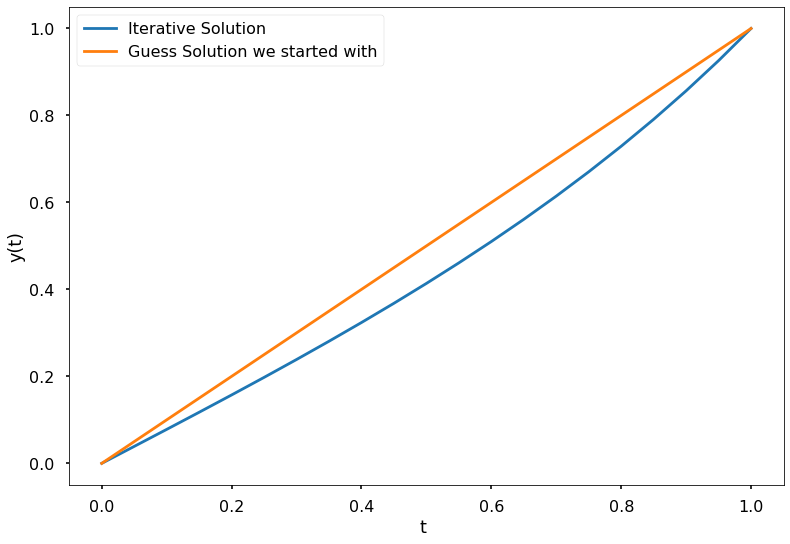

Error in the diff eq:  0.03956179467444254


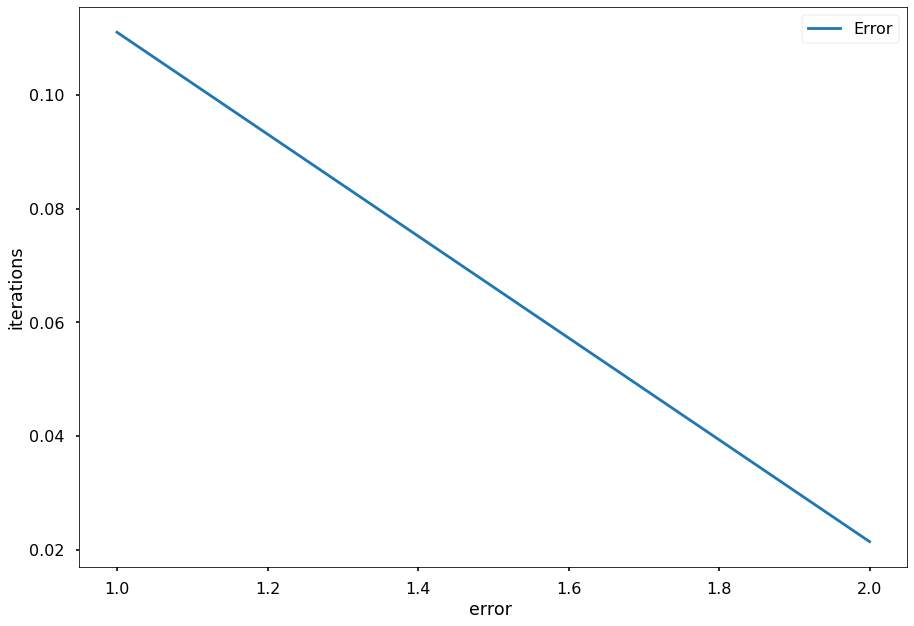

In [111]:
#####################################################################
# For Academic Projects - R Ganesh, IPR                             # 
# Feb-May 2022                                                      #
# y'' = y where c is consant, y(t0)=0, y(tend)=rightboundaryvalue   #
# Let us solve using finite difference method with grid points n    #
#####################################################################
# Other free sources : http://www.gnu.org/software/octave/          #
# Other free sources : http://www.scilab.org                        #
# Other `restricted' sources : http://www.gnu.org/software/gsl/     #
#####################################################################
import numpy as np
import matplotlib.pyplot as plt
from numpy import*
import math
from pylab import * # for plotting commands
#####################################################################    
# In the example below, the following values are used
# t0=0.0, tend=5.0, n=12, constant c=9.8, rightboundaryvalue=10
#####################################################################    

plt.style.use('seaborn-poster')
# n+1 is the number of points
n = 20  #grid size
t0=0.0  #Boundary values defined
tend=1.0
mu=1.25
rightboundaryvalue=1
h = (tend - t0) / n
t = np.linspace(t0, tend, n+1)
yguess=t #straight line sat BVC
# Get C
c=np.zeros(n+1)
for i in range(1,n+1):
    c[i]=mu*sinh(mu *yguess[i])
    
#plt.plot(t,c)
    
# Get A -> LHS
A = np.zeros((n+1, n+1)) #returns a new array of shape n1, n+1 filled with zeroes
A[0, 0] = 1
A[n, n] = 1
for i in range(1, n):
    A[i, i-1] = 1
    A[i, i] = -2
    A[i, i+1] = 1



#Loop Beginning
iteration=1
itern=3
y=np.zeros(n+1)
ynew=np.zeros(n+1)
yold=np.zeros(n+1)
y=yguess
er_list=[]
while(iteration<itern):
    # Get b -> RHS
    b = np.zeros(n+1) 
    for i in range(1,n):
        b[i]=c[i]*h**2
        #b[1:-1] = c[i]*h**2   #changed this
        b[-1] = rightboundaryvalue
    # solve the linear equations
    yold=y
    y = np.linalg.solve(A, b)
    ynew=y
    c=mu*sinh(mu*y)
    #print(c)
    #if (iteration>=1):
    #print("ynew :", ynew, " yold: ", yold)
    er= max(abs(ynew-yold))
    er_list.append(er)
    print("Iteration ",iteration, "Error: ", er)
    iteration=iteration+1

#Loop End
# Analytical Y - true value 
#ytrue= (exp(t)-exp(-t))/(exp(1)-exp(-1)) #alpha = 0
#yguess=t
iter_list=list(range(1,itern))
# Plotting

f1=plt.figure(1)
#plt.figure(figsize=(n,8))
plt.plot(t, y, label="Iterative Solution")
plt.plot(t, yguess, label="Guess Solution we started with")
plt.xlabel('t ')
plt.ylabel('y(t)')
plt.legend()
plt.show()

# Check sol satisies the diff eq d2y/dt2=mu * sinh (mu * y[t])
lhs=np.zeros(n+1)
rhs=np.zeros(n+1)

for i in range(1, n):
    lhs[i]=(y[i+1]-2*y[i]+y[i-1])/h**2
    rhs[i]=mu * sinh (mu * y[i])
error=max(abs(lhs-rhs))
print("Error in the diff eq: ",error)

f2=plt.figure(2)
#plt.figure(figsize=(n,8))
plt.plot(iter_list, er_list, label = "Error")
plt.xlabel('error ')
plt.ylabel('iterations')
plt.legend()
plt.tight_layout()
plt.show()

iteration : 0
Max error  : 0.0625
End of Iterations
iteration : 1
Max error  : 0.0068359375
End of Iterations
iteration : 2
Max error  : 0.000732421875
End of Iterations
iteration : 3
Max error  : 7.820129394525699e-05
End of Iterations
iteration : 4
Max error  : 8.344650268499176e-06
End of Iterations
iteration : 5
Max error  : 8.903443812768863e-07
End of Iterations


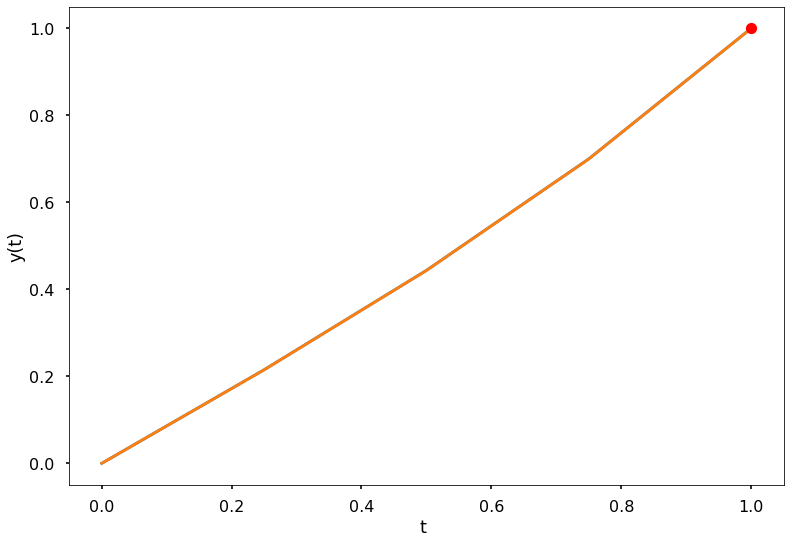

In [69]:
#####################################################################
# For Academic Projects - R Ganesh, IPR                             # 
# Feb-May 2022 : Troesch's Problem                                  #
# y''=mu sinh(mu*y) where mu is cons, y(t0)=0, y(tend)=rightboundaryvalue   #
# Let us solve using finite difference method with grid points n    #
#####################################################################
# Other free sources : http://www.gnu.org/software/octave/          #
# Other free sources : http://www.scilab.org                        #
# Other `restricted' sources : http://www.gnu.org/software/gsl/     #
#####################################################################
import numpy as np
import matplotlib.pyplot as plt
from numpy import*
from pylab import * # for plotting commands
#####################################################################    
# In the example below, the following values are used
# t0=0.0, tend=5.0, n=12, constant c=9.8, rightboundaryvalue=10
#####################################################################    

plt.style.use('seaborn-poster')

n = 4  #no. of grid points
t0=0.0 
tend=1.0
rightboundaryvalue=1.0
h = (tend - t0) / n
mu = 2.5
niter=6

t = np.linspace(t0, tend, n+1)
yguess = np.zeros(n+1)
yold = np.zeros(n+1)
c = np.zeros(n+1)

for i in range(1, n+1):
    yguess[i] = t[i]
    #yguess[i] = rightboundaryvalue*t[i]/tend
    yold[i]=yguess[i]
    #c[i] = mu*(np.exp(mu*yguess[i])-np.exp(-mu*yguess[i]))/2.0
    c[i] = yguess[i]
#plt.figure
#plt.plot(t, yguess)
#plt.plot(t, c)


error = np.zeros(n+1)
iteration=0


# Get A
A = np.zeros((n+1, n+1))
A[0, 0] = 1
A[n, n] = 1
for i in range(1, n):
    A[i, i-1] = 1
    A[i, i] = -2
    A[i, i+1] = 1

#    print(A)
while iteration < niter :
    print ("iteration : %s"%iteration)
    b = np.zeros(n+1)
    for i in range(1, n):
        b[i] =  c[i]*h**2

    b[-1] = rightboundaryvalue

#    print(b)

# solve the linear equations
    y = np.linalg.solve(A, b)

    cnew= np.zeros(n+1)
    for i in range(1,n+1):
        #cnew[i] = mu*( np.exp(mu*y[i])-np.exp(-mu*y[i]) )/2.0
        cnew[i] = y[i]
        error[i] = np.abs(y[i]-yold[i])
  
    errormax=np.max(error)
    c=cnew
    yold=y
    print("Max error  : %s"%errormax)
    iteration += 1    
    
    print("End of Iterations")
    
t = np.linspace(t0, tend, n+1)

plt.figure #(figsize=(n,8))
plt.plot(t, y)
plt.plot(t, (exp(t)-exp(-t))/(exp(1)-exp(-1)))
plt.plot(tend, rightboundaryvalue, 'ro')
plt.xlabel('t ')
plt.ylabel('y(t)')
plt.show()


In [54]:
y='just kidding'
def func():
    x='lol'
    x=y
    print(x)
    
func()

just kidding
